## Observations and Insights

## Dependencies and starter code

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
joined_df = mouse_metadata.merge(study_results, on='Mouse ID')
joined_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

## Summary statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
#grouped_describe = joined_df.groupby(['Drug Regimen']).describe()['Tumor Volume (mm3)']
grouped_df = joined_df.groupby(['Drug Regimen'])
tumor_calc_df = pd.DataFrame({"Tumor Volume (mm3) Mean": grouped_df["Tumor Volume (mm3)"].mean(),
                              "Tumor Volume (mm3) Median": grouped_df["Tumor Volume (mm3)"].median(),
                              "Tumor Volume (mm3) Variance": grouped_df["Tumor Volume (mm3)"].var(),
                              "Tumor Volume (mm3) Std Dev": grouped_df["Tumor Volume (mm3)"].std(),
                              "Tumor Volume (mm3) SEM": grouped_df["Tumor Volume (mm3)"].sem()})
tumor_calc_df

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Std Dev,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

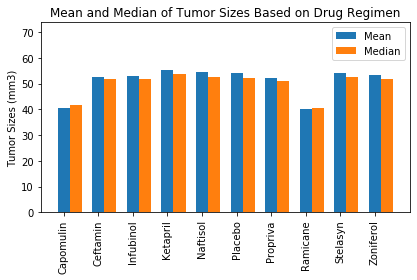

In [22]:
# Generate a bar plot showing number of data points for each treatment regimen using panda

drugs = list(tumor_calc_df.index)
x_axis = np.arange(len(drugs))

mean = tumor_calc_df['Tumor Volume (mm3) Mean']
median = tumor_calc_df['Tumor Volume (mm3) Median']
width = 0.35  


fig, mean_median = plt.subplots()
p1 = mean_median.bar(x_axis, mean, width, label = 'Mean')
p2 = mean_median.bar(x_axis + width, median, width, label = 'Median')

mean_median.set_ylabel('Tumor Sizes (mm3)')
mean_median.set_ylim(0, max(tumor_calc_df['Tumor Volume (mm3) Median']) + 20)
mean_median.set_title('Mean and Median of Tumor Sizes Based on Drug Regimen')
mean_median.set_xticks(x_axis)
mean_median.set_xticklabels(list(drugs), rotation = 'vertical')
mean_median.legend()

fig.tight_layout()

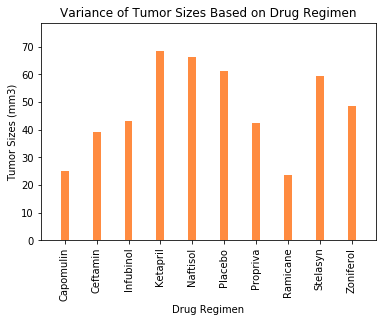

<Figure size 432x288 with 0 Axes>

In [23]:
plt.bar(x_axis, tumor_calc_df['Tumor Volume (mm3) Variance'], color = "#ff6500", alpha = 0.75, width = 0.25, align = "center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation = 'vertical')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, tumor_calc_df['Tumor Volume (mm3) Variance'].max() + 10)
plt.title("Variance of Tumor Sizes Based on Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Sizes (mm3)")

plt.show()
plt.tight_layout()

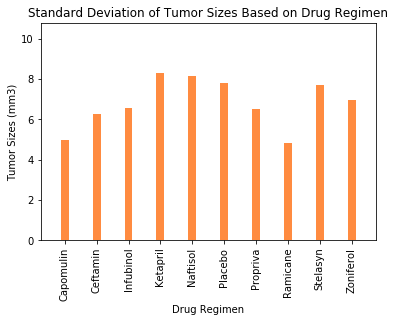

<Figure size 432x288 with 0 Axes>

In [24]:
plt.bar(x_axis, tumor_calc_df['Tumor Volume (mm3) Std Dev'], color = "#ff6500", alpha = 0.75, width = 0.25, align = "center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation = 'vertical')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, tumor_calc_df['Tumor Volume (mm3) Std Dev'].max() + 2.5)
plt.title("Standard Deviation of Tumor Sizes Based on Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Sizes (mm3)")

plt.show()
plt.tight_layout()

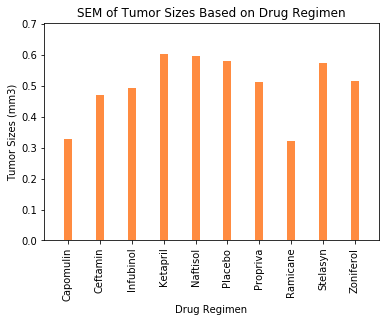

<Figure size 432x288 with 0 Axes>

In [25]:
plt.bar(x_axis, tumor_calc_df['Tumor Volume (mm3) SEM'], color = "#ff6500", alpha = 0.75, width = 0.25, align = "center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation = 'vertical')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, tumor_calc_df['Tumor Volume (mm3) SEM'].max() + 0.10)
plt.title("SEM of Tumor Sizes Based on Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Sizes (mm3)")

plt.show()
plt.tight_layout()

In [26]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

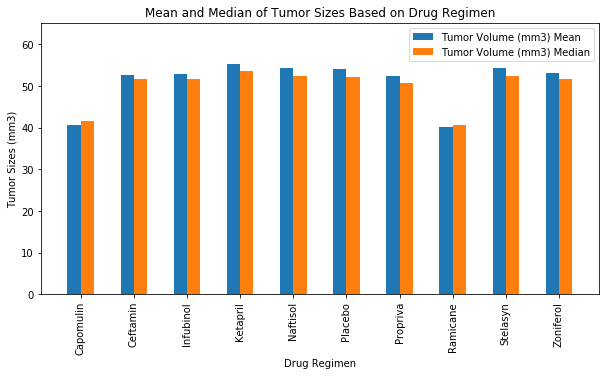

<Figure size 432x288 with 0 Axes>

In [27]:
mean_panda_bar = tumor_calc_df.plot.bar(y=['Tumor Volume (mm3) Mean','Tumor Volume (mm3) Median'], rot=90, figsize = (10, 5))
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, tumor_calc_df['Tumor Volume (mm3) Mean'].max() + 10)
plt.title("Mean and Median of Tumor Sizes Based on Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Sizes (mm3)")
plt.show()
plt.tight_layout()

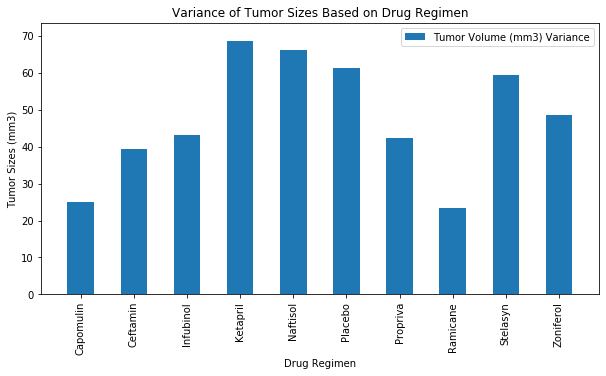

<Figure size 432x288 with 0 Axes>

In [28]:
var_panda_bar = tumor_calc_df.plot.bar(y='Tumor Volume (mm3) Variance', rot=90, figsize = (10, 5))
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, tumor_calc_df['Tumor Volume (mm3) Variance'].max() + 5)
plt.title("Variance of Tumor Sizes Based on Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Sizes (mm3)")
plt.show()
plt.tight_layout()

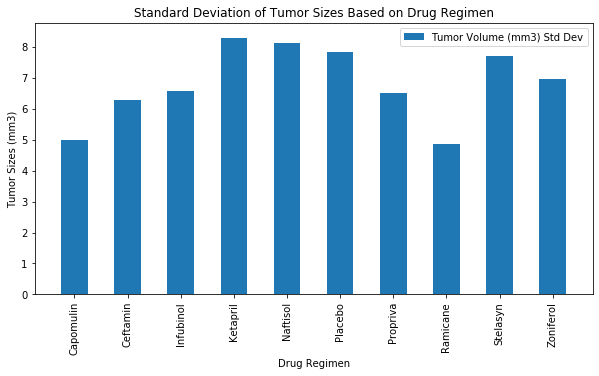

<Figure size 432x288 with 0 Axes>

In [29]:
std_panda_bar = tumor_calc_df.plot.bar(y='Tumor Volume (mm3) Std Dev', rot=90, figsize = (10, 5))
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, tumor_calc_df['Tumor Volume (mm3) Std Dev'].max() + 0.5)
plt.title("Standard Deviation of Tumor Sizes Based on Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Sizes (mm3)")
plt.show()
plt.tight_layout()

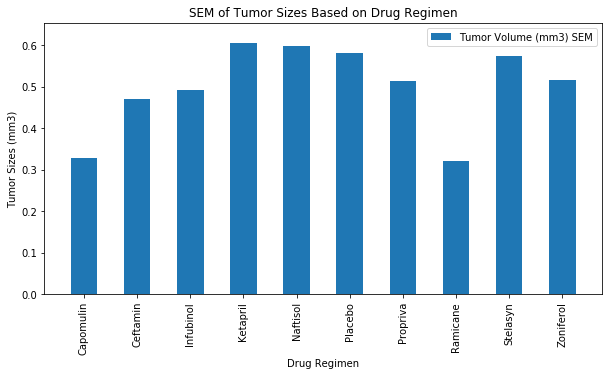

<Figure size 432x288 with 0 Axes>

In [30]:
sem_panda_bar = tumor_calc_df.plot.bar(y='Tumor Volume (mm3) SEM', rot=90, figsize = (10, 5))
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, tumor_calc_df['Tumor Volume (mm3) SEM'].max()+0.05)
plt.title("SEM of Tumor Sizes Based on Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Sizes (mm3)")
plt.show()
plt.tight_layout()

## Pie plots

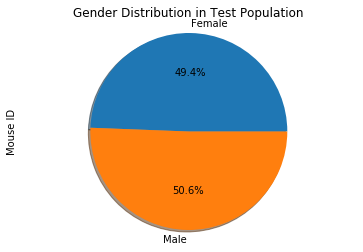

<Figure size 432x288 with 0 Axes>

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = joined_df.groupby(['Sex'])
gender_data = gender_df['Mouse ID'].count()

gender_pie = gender_data.plot(kind="pie", y=gender_data, title=("Gender Distribution in Test Population"), 
                              autopct='%1.1f%%', shadow = True)

plt.axis("equal")
plt.show()
plt.tight_layout()

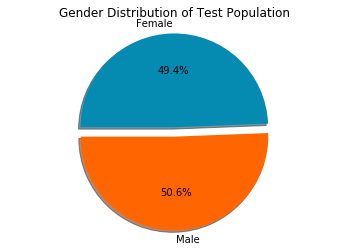

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_labels = joined_df['Sex'].unique()
gender_percent = joined_df['Sex'].value_counts()/joined_df['Sex'].count()
colors = ["#ff6500", "#058ab1"]
explode = (0.1, 0)

plt.pie(gender_percent, explode=explode, labels=gender_labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle = 180)
plt.title("Gender Distribution of Test Population")
plt.axis("equal")
plt.show()


## Quartiles, outliers and boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

# Found latest stage data for test subjects by sorting through age first
sorted_joined = joined_df.nlargest(100,['Age_months','Timepoint'])

# Eliminate duplicate drug regimen
sorted_cleaned = sorted_joined.drop_duplicates("Drug Regimen")

# Find the smallest tumor size/volume, which should equate to effectiveness
sorted_tumor_size = sorted_cleaned.nsmallest(4,'Tumor Volume (mm3)')

sorted_tumor_size

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
224,w914,Capomulin,Male,24,21,45,36.041047,2
1739,x111,Propriva,Female,24,27,10,49.122969,1
993,j296,Ceftamin,Female,24,30,45,61.849023,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3


In [34]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = joined_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The interquartile range of tumor volume is {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

vol_reference = sorted_tumor_size["Tumor Volume (mm3)"]

for volume in vol_reference:
    if volume > upper_bound or volume < lower_bound:
        print(f"There are potential outlier(s).")
    else:
        print(f"There are no potential outlier(s).")

The interquartile range of tumor volume is 11.292200389999998
Values below 28.061699415000003 could be outliers.
Values above 73.230500975 could be outliers.
There are no potential outlier(s).
There are no potential outlier(s).
There are no potential outlier(s).
There are no potential outlier(s).


In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_stage = joined_df.loc[joined_df['Age_months'] == 24]
final_drugs = []
final_timepoints = []
final_volumes = []

for drug in final_stage['Drug Regimen']:
    final_timepoints.append(final_stage['Timepoint'].max())
    final_drugs.append(final_stage['Drug Regimen'])
    final_volumes.append(final_stage['Tumor Volume (mm3)'])
    
final_df = pd.DataFrame({"Drug Regimen" : final_drugs,
                         "Timepoint" : final_timepoints,
                         "Tumor Volume (mm3)" : final_volumes})

final_df

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,215 Capomulin 216 Capomulin 217 Ca...,45,215 45.000000 216 45.893720 217 43...
1,215 Capomulin 216 Capomulin 217 Ca...,45,215 45.000000 216 45.893720 217 43...
2,215 Capomulin 216 Capomulin 217 Ca...,45,215 45.000000 216 45.893720 217 43...
3,215 Capomulin 216 Capomulin 217 Ca...,45,215 45.000000 216 45.893720 217 43...
4,215 Capomulin 216 Capomulin 217 Ca...,45,215 45.000000 216 45.893720 217 43...
5,215 Capomulin 216 Capomulin 217 Ca...,45,215 45.000000 216 45.893720 217 43...
6,215 Capomulin 216 Capomulin 217 Ca...,45,215 45.000000 216 45.893720 217 43...
7,215 Capomulin 216 Capomulin 217 Ca...,45,215 45.000000 216 45.893720 217 43...
8,215 Capomulin 216 Capomulin 217 Ca...,45,215 45.000000 216 45.893720 217 43...
9,215 Capomulin 216 Capomulin 217 Ca...,45,215 45.000000 216 45.893720 217 43...


## Line and scatter plots

In [84]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#joined_df

referenced_df = joined_df[['Mouse ID', 'Drug Regimen','Weight (g)', 'Timepoint','Tumor Volume (mm3)']]
referenced_narrowed = referenced_df.loc[referenced_df['Drug Regimen'] == "Capomulin"]
mouse_ident = referenced_narrowed.loc[referenced_narrowed['Mouse ID'] == "s185"]

mouse_ident

,Mouse ID,Drug Regimen,Weight (g),Timepoint,Tumor Volume (mm3)
10,s185,Capomulin,17,0,45.000000
11,s185,Capomulin,17,5,43.878496
12,s185,Capomulin,17,10,37.614948
13,s185,Capomulin,17,15,38.177232
14,s185,Capomulin,17,20,36.866876
15,s185,Capomulin,17,25,33.949940
16,s185,Capomulin,17,30,32.959671
17,s185,Capomulin,17,35,28.328531
18,s185,Capomulin,17,40,25.472143
19,s185,Capomulin,17,45,23.343598


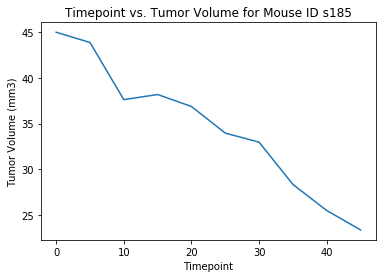

In [94]:
x_axis = np.arange(0, 50, 5)
y_values = mouse_ident['Tumor Volume (mm3)']

plt.plot(x_axis, y_values)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs. Tumor Volume for Mouse ID s185")

plt.show()

In [105]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_grouped = referenced_narrowed.groupby("Weight (g)")
vol_avg_by_weight = referenced_narrowed.groupby("Weight (g)").mean()["Tumor Volume (mm3)"]

x_limit = 50


In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen